In [1]:
import numpy as np
import scipy.io as sio

import pandas as pd
import datetime as dt
import xarray as xr

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
rootdir = '/global/cfs/projectdirs/m1657/liuy351/TallTower/SCL/'


In [3]:
opt_model = 'R18'

In [4]:
ts_full = pd.date_range('2001-01-01 00:00', end='2020-12-31 23:00', freq='D')

## 1. Run a classifier to cluster weather systems

### 1.1 5 years

In [13]:
tag_year = (ts_full.year>=2001)&(ts_full.year<=2020)
time = ts_full[tag_year==1]
print(tag_year.shape, tag_year.sum())

(7305,) 7305


In [6]:
infile = rootdir + 'ResNet_output/%s_output.anomaly.2001-2020.ERA5.mat' % opt_model
print(infile)
inds = sio.loadmat(infile)
full_NCLtag = inds['ResNetoutput'][tag_year==1]

print(full_NCLtag.shape)

/global/cfs/projectdirs/m1657/liuy351/TallTower/SCL/ResNet_output/R18_output.anomaly.2001-2020.ERA5.mat
(7305, 512)


In [7]:
# import dask.array as da
# full_NCLtag = da.from_array(full_NCLtag, chunks=(128, 512))

In [24]:
kmean_results = {}
ss = {}
wcss = {}

#for nclass in np.arange(2, 3, 1):

for nclass in np.arange(2, 42, 1):

    print(nclass)
    print(' start ', dt.datetime.now())
    # kmean_model = KMeans(n_clusters=nclass, n_init=10, random_state=330)
    kmean_model = KMeans(n_clusters=nclass, n_init=10, random_state=330)
    kmean_results['C%d'%nclass] = kmean_model.fit(full_NCLtag).labels_
    ss['C%d'%nclass] = silhouette_score(full_NCLtag, kmean_results['C%d'%nclass])
    wcss['C%d'%nclass] = kmean_model.inertia_
    print(' end ', dt.datetime.now())

2
 start  2024-06-25 22:50:36.927502
 end  2024-06-25 22:50:38.553026
3
 start  2024-06-25 22:50:38.553127
 end  2024-06-25 22:50:40.505875
4
 start  2024-06-25 22:50:40.505978
 end  2024-06-25 22:50:42.610888
5
 start  2024-06-25 22:50:42.610998
 end  2024-06-25 22:50:44.911200
6
 start  2024-06-25 22:50:44.911304
 end  2024-06-25 22:50:47.498221
7
 start  2024-06-25 22:50:47.498330
 end  2024-06-25 22:50:50.174984
8
 start  2024-06-25 22:50:50.175089
 end  2024-06-25 22:50:53.212098
9
 start  2024-06-25 22:50:53.212224
 end  2024-06-25 22:50:55.700994
10
 start  2024-06-25 22:50:55.701097
 end  2024-06-25 22:50:58.461216
11
 start  2024-06-25 22:50:58.461315
 end  2024-06-25 22:51:01.314397
12
 start  2024-06-25 22:51:01.314497
 end  2024-06-25 22:51:04.208917
13
 start  2024-06-25 22:51:04.209017
 end  2024-06-25 22:51:07.924442
14
 start  2024-06-25 22:51:07.924553
 end  2024-06-25 22:51:11.297047
15
 start  2024-06-25 22:51:11.297167
 end  2024-06-25 22:51:14.313245
16
 start  202

In [23]:
kmean_model.inertia_

99008.4434195769

In [15]:
kmean_results = xr.Dataset({key: (["time"], value) for key, value in kmean_results.items()})
kmean_results.coords['time'] = time
kmean_results.attrs['description'] = 'Classification using K-means'
kmean_results.attrs['script'] = '/global/cfs/projectdirs/m1657/liuy351/TallTower/SCL/04.clustering_kmean.ipynb'
kmean_results.to_netcdf(f'{rootdir}/ResNet_output/{opt_model}_cluster.kmeans.2001-2020.ERA5.nc')
kmean_results

<xarray.Dataset> Size: 1MB
Dimensions:  (time: 7305)
Coordinates:
  * time     (time) datetime64[ns] 58kB 2001-01-01 2001-01-02 ... 2020-12-31
Data variables: (12/40)
    C2       (time) int32 29kB 0 0 0 0 0 1 1 1 1 1 1 1 ... 1 1 0 0 1 1 1 1 1 1 1
    C3       (time) int32 29kB 0 1 1 1 0 0 0 0 0 2 2 2 ... 0 2 1 1 0 2 0 2 0 0 0
    C4       (time) int32 29kB 3 1 1 1 3 3 3 0 0 2 2 0 ... 0 2 1 1 3 2 0 0 0 3 0
    C5       (time) int32 29kB 0 1 1 1 0 2 2 4 4 3 3 4 ... 4 3 1 1 2 3 4 4 2 2 4
    C6       (time) int32 29kB 5 3 3 3 5 5 0 1 1 2 2 1 ... 1 2 3 3 0 2 1 1 0 0 0
    C7       (time) int32 29kB 5 4 4 4 5 5 3 6 6 0 0 2 ... 6 0 4 4 3 6 6 2 3 3 6
    ...       ...
    C36      (time) int32 29kB 30 26 26 26 30 2 23 14 ... 18 23 24 3 12 28 6 32
    C37      (time) int32 29kB 10 32 32 32 10 10 31 18 ... 17 4 35 3 27 0 21 25
    C38      (time) int32 29kB 24 28 28 28 1 24 19 4 ... 28 19 34 26 2 6 15 20
    C39      (time) int32 29kB 20 22 22 22 20 20 37 10 ... 22 37 6 38 16 28 24 8
    C40      (time) int32 29kB 33 6 6 20 33 21 22 35 ... 27 22 14 35 19 15 39 23
    C41      (time) int32 29kB 14 35 35 8 14 6 33 29 29 ... 0 33 27 29 34 4 25 1
Attributes:
    description:  Classification using K-means
    script:       /global/cfs/projectdirs/m1657/liuy351/TallTower/SCL/04.clus...

In [25]:
ss = xr.DataArray(list(ss.values()), coords=[list(ss.keys())], dims=["cat"])
ss

<xarray.DataArray (cat: 40)> Size: 320B
array([0.34435023, 0.35051056, 0.26859344, 0.23551546, 0.24074355,
       0.24346585, 0.22557847, 0.23059395, 0.21358724, 0.20524732,
       0.19245377, 0.19532598, 0.1844207 , 0.18378487, 0.17576564,
       0.17513902, 0.17429689, 0.17438348, 0.17172454, 0.167428  ,
       0.16730432, 0.16611147, 0.16193997, 0.16158696, 0.15824431,
       0.1584517 , 0.15707721, 0.15739836, 0.15364874, 0.1516125 ,
       0.1506656 , 0.15221213, 0.15156377, 0.145035  , 0.14540306,
       0.14907545, 0.1448267 , 0.14472913, 0.1443788 , 0.1432344 ])
Coordinates:
  * cat      (cat) <U3 480B 'C2' 'C3' 'C4' 'C5' 'C6' ... 'C38' 'C39' 'C40' 'C41'

In [26]:
wcss = xr.DataArray(list(wcss.values()), coords=[list(wcss.keys())], dims=["cat"])
wcss

<xarray.DataArray (cat: 40)> Size: 320B
array([510044.08683666, 354394.45345425, 293880.00962819, 262327.5810554 ,
       237514.4946239 , 215523.83526893, 200469.70199136, 187323.72749165,
       176421.65872911, 167777.133796  , 161662.7053039 , 155995.24145904,
       150915.21545469, 146959.63911729, 143264.79271197, 139941.40725667,
       136237.27329393, 132818.94552877, 129855.27415111, 127441.67547663,
       124545.4355266 , 122599.39055188, 120330.90032624, 118336.42494164,
       117087.08886331, 115698.06456789, 113390.40375835, 112063.83014711,
       110850.62302641, 109726.49595562, 108281.59788304, 107083.25877415,
       105466.20032689, 104869.91613885, 103738.58315592, 102593.35856752,
       101754.68184842, 100669.67655179,  99602.68392855,  99008.44341958])
Coordinates:
  * cat      (cat) <U3 480B 'C2' 'C3' 'C4' 'C5' 'C6' ... 'C38' 'C39' 'C40' 'C41'

In [36]:
# Calculate the differences and second derivatives of the WCSS
diff_wcss = np.diff(wcss[2:])
diff2_wcss = np.diff(diff_wcss[2:])

# Find the elbow point
elbow_point = np.argmax(diff2_wcss) + 2 
elbow_point

2

In [34]:
diff2_wcss

array([ 9.51351896e+04,  2.89620153e+04,  6.73934214e+03,  2.82242708e+03,
        6.93652608e+03,  1.90815878e+03,  2.24390574e+03,  2.25754383e+03,
        2.53009644e+03,  4.46964647e+02,  5.87437840e+02,  1.12444967e+03,
        2.60729932e+02,  3.71460950e+02, -3.80748507e+02,  2.85806198e+02,
        4.54656387e+02,  5.50072703e+02, -4.82641276e+02,  9.50194975e+02,
       -3.22445251e+02,  2.74014841e+02,  7.45139306e+02, -1.39688217e+02,
       -9.18636514e+02,  9.81087198e+02,  1.13366491e+02,  8.90800499e+01,
       -3.20771002e+02,  2.46558964e+02, -4.18719338e+02,  1.02077426e+03,
       -5.35048795e+02, -1.38916055e+01,  3.06547869e+02, -2.46328578e+02,
        1.80126734e+01,  4.72752114e+02])

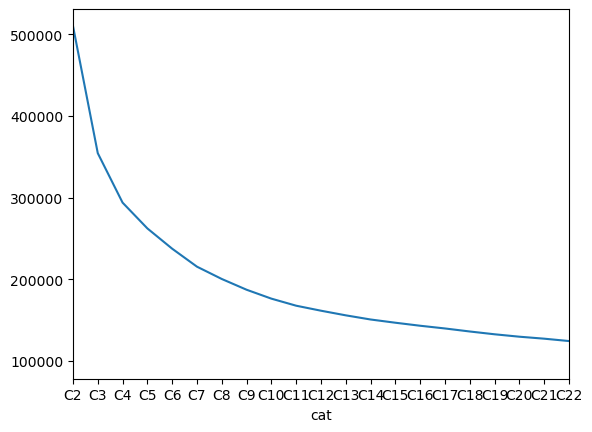

In [30]:
wcss.plot(xlim=(0,20))

In [ ]:
tmpfile = rootdir + 'intermediate_data/weather_clustering/RH_input/%s.weather_clustering.40year_training.mat' % opt_model

kmean_results['script'] = '/global/cfs/projectdirs/m1657/liuy351/TallTower/From_XD/step03.clustering_production_run.ipynb'
kmean_results['note'] = 'Only for Oct-Mar. Use pandas to create a time series and filter out data. K-means trained using 40-year data. Not training-testing split'

sio.savemat(tmpfile, kmean_results)

### 1.2 30 year as training, then applied to 40 years

In [ ]:
tag_winter_30year = (ts_full.year<=2010)&((ts_full.month>=10)|(ts_full.month<=3))
print(tag_winter_30year.shape, tag_winter_30year.sum())

(14610,) 5467


In [ ]:
infile = rootdir + 'ResNet_output/RH_input/%s_output.anomaly.daymean.1981-2020.ERA5.mat' % opt_model

inds = sio.loadmat(infile)
full_NCLtag_training = inds['ResNetoutput'][tag_winter_30year==1]
full_NCLtag_prediction = inds['ResNetoutput'][tag_winter_40year==1]

print(full_NCLtag_training.shape, full_NCLtag_prediction.shape)

(5467, 512) (7290, 512)


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
# kmeans = KMeans(n_clusters=2, random_state=42)
# silhouette_score(X, kmeans.fit_predict(X))
kmeans.fit_predict(X)

/global/homes/y/yeliu/.conda/envs/compute/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [ ]:
kmean_results = {}
ss = {}

#for nclass in np.arange(2, 3, 1):

for nclass in np.arange(2, 42, 1):

    print(nclass)
    print(' start ', dt.datetime.now())
    kmean_model = KMeans(n_clusters=nclass, n_init=10, random_state=42)
    whatever_output = kmean_model.fit(full_NCLtag_training).labels_
    kmean_results['C%d'%nclass] = kmean_model.predict(full_NCLtag_prediction)
    ss['C%d'%nclass] = silhouette_score(full_NCLtag_prediction, kmean_results['C%d'%nclass])
    print(' end ', dt.datetime.now())

NameError: name 'np' is not defined

In [ ]:
kmean_results['year'] = np.array(ts_full.year[tag_winter_40year])
kmean_results['month'] = np.array(ts_full.month[tag_winter_40year])
kmean_results['day'] = np.array(ts_full.day[tag_winter_40year])

In [ ]:
tmpfile = rootdir + 'intermediate_data/weather_clustering/RH_input/%s.weather_clustering.30year_training.mat' % opt_model

kmean_results['script'] = '/global/cfs/projectdirs/m1657/liuy351/TallTower/From_XD/step03.clustering_production_run.ipynb'
kmean_results['note'] = 'Only for Oct-Mar. Use pandas to create a time series and filter out data. K-means trained using 30-year data (1981-2010). 2011-2020 are prediction'

sio.savemat(tmpfile, kmean_results)

### 1.3 20-year as training

In [ ]:
tag_winter_20year = (ts_full.year<=2000)&((ts_full.month>=10)|(ts_full.month<=3))
print(tag_winter_20year.shape, tag_winter_20year.sum())

(14610,) 3645


In [ ]:
infile = rootdir + 'ResNet_output/RH_input/%s_output.anomaly.daymean.1981-2020.ERA5.mat' % opt_model

inds = sio.loadmat(infile)
full_NCLtag_training = inds['ResNetoutput'][tag_winter_20year==1]
full_NCLtag_prediction = inds['ResNetoutput'][tag_winter_40year==1]

print(full_NCLtag_training.shape, full_NCLtag_prediction.shape)

(3645, 512) (7290, 512)


In [ ]:
kmean_results = {}

#for nclass in np.arange(2, 3, 1):

for nclass in np.arange(2, 42, 1):

    print(nclass)
    print(' start ', dt.datetime.now())
    kmean_model = KMeans(n_clusters=nclass, n_init=10, random_state=42)
    whatever_output = kmean_model.fit(full_NCLtag_training).labels_
    kmean_results['C%d'%nclass] = kmean_model.predict(full_NCLtag_prediction)
    print(' end ', dt.datetime.now())

2
 start  2024-06-19 11:12:34.943046
 end  2024-06-19 11:12:35.254898
3
 start  2024-06-19 11:12:35.255035
 end  2024-06-19 11:12:35.676436
4
 start  2024-06-19 11:12:35.676569
 end  2024-06-19 11:12:36.185417
5
 start  2024-06-19 11:12:36.185535
 end  2024-06-19 11:12:36.778853
6
 start  2024-06-19 11:12:36.778966
 end  2024-06-19 11:12:37.376690
7
 start  2024-06-19 11:12:37.376788
 end  2024-06-19 11:12:38.196203
8
 start  2024-06-19 11:12:38.196315
 end  2024-06-19 11:12:39.093319
9
 start  2024-06-19 11:12:39.093435
 end  2024-06-19 11:12:39.896669
10
 start  2024-06-19 11:12:39.896775
 end  2024-06-19 11:12:40.996252
11
 start  2024-06-19 11:12:40.996359
 end  2024-06-19 11:12:41.957062
12
 start  2024-06-19 11:12:41.957160
 end  2024-06-19 11:12:42.777701
13
 start  2024-06-19 11:12:42.777815
 end  2024-06-19 11:12:43.765905
14
 start  2024-06-19 11:12:43.766009
 end  2024-06-19 11:12:44.868077
15
 start  2024-06-19 11:12:44.868187
 end  2024-06-19 11:12:45.955201
16
 start  202

In [ ]:
kmean_results['year'] = np.array(ts_full.year[tag_winter_40year])
kmean_results['month'] = np.array(ts_full.month[tag_winter_40year])
kmean_results['day'] = np.array(ts_full.day[tag_winter_40year])

In [ ]:
tmpfile = rootdir + 'intermediate_data/weather_clustering/RH_input/%s.weather_clustering.20year_training.mat' % opt_model

kmean_results['script'] = '/global/cfs/projectdirs/m1657/liuy351/TallTower/From_XD/step03.clustering_production_run.ipynb'
kmean_results['note'] = 'Only for Oct-Mar. Use pandas to create a time series and filter out data. K-means trained using 20-year data (1981-2010). 2001-2020 are prediction'

sio.savemat(tmpfile, kmean_results)

In [ ]:
kmean_results['C17']

NameError: name 'kmean_results' is not defined